In [1]:
%matplotlib inline

import warnings
import os
from pathlib import Path
import quandl
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, IncrementalPCA, FastICA

In [28]:
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.random.seed(42)

In [29]:
with pd.HDFStore('../../data/assets.h5') as store:
    prices = store['quandl/wiki/prices'].adj_close.unstack('ticker')
    stocks = store['us_equities/stocks']

In [77]:
shared = prices.columns.intersection(stocks.index)
prices = prices.loc['2000':, shared]
stocks = stocks.loc[shared, ['marketcap', 'ipoyear', 'sector']]

In [98]:
# returns = prices.resample('W').last().pct_change()
returns = prices.pct_change()
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4706 entries, 2000-01-03 to 2018-03-27
Columns: 2412 entries, A to ZUMZ
dtypes: float64(2412)
memory usage: 86.6 MB


In [99]:
returns = returns.dropna(thresh=500)
returns = returns.dropna(thresh=int(len(returns) * .95), axis=1)
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4585 entries, 2000-01-04 to 2018-03-27
Columns: 1473 entries, A to ZIXI
dtypes: float64(1473)
memory usage: 51.6 MB


In [91]:
returns = returns.sample(n=50, axis=1)

In [100]:
daily_avg = returns.mean(1)
returns = returns.apply(lambda x: x.fillna(daily_avg))

In [101]:
pca = PCA()

In [102]:
pca.fit(returns)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

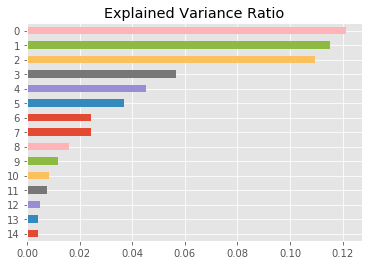

In [105]:
pd.Series(pca.explained_variance_ratio_).iloc[:15].sort_values().plot.barh(title='Explained Variance Ratio');

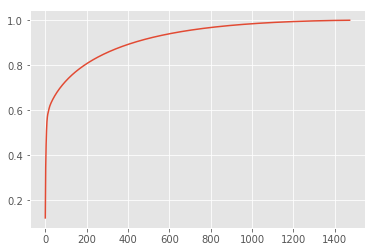

In [104]:
pd.Series(pca.explained_variance_ratio_).cumsum().plot();

In [97]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2008-07-13 to 2018-04-01
Freq: W-SUN
Columns: 250 entries, DRE to CRS
dtypes: float64(250)
memory usage: 1016.2 KB
